In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**Data Cleaning**

In [4]:
# checking null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
# checking dtype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


C:\Users\Nidhi\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

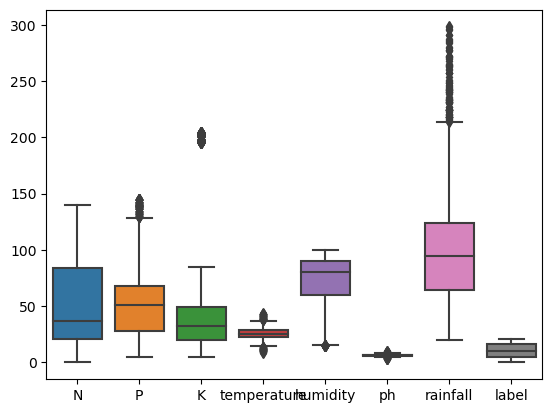

In [37]:
sns.boxplot(data=df)

**Data Exploration**

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

**Data Preprocessing**

In [10]:
from sklearn import preprocessing

In [11]:
label_encoder=preprocessing.LabelEncoder()

In [12]:
df['label']=label_encoder.fit_transform(df['label'])

In [13]:
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [14]:
x=df.drop('label',axis=1)
y=df['label']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


In [18]:
print(x_test)

        N    P    K  temperature   humidity        ph    rainfall
1451  101   17   47    29.494014  94.729813  6.185053   26.308209
1334   98    8   51    26.179346  86.522581  6.259336   49.430510
1761   59   62   49    43.360515  93.351916  6.941497  114.778071
1735   44   60   55    34.280461  90.555616  6.825371   98.540477
1576   30  137  200    22.914300  90.704756  5.603413  118.604465
...   ...  ...  ...          ...        ...       ...         ...
59     99   55   35    21.723831  80.238990  6.501698  277.962619
71     67   45   38    22.727910  82.170688  7.300411  260.887506
1908  121   47   16    23.605640  79.295731  7.723240   72.498009
1958  116   52   19    22.942767  75.371706  6.114526   67.080226
482     5   68   20    19.043805  33.106951  6.121667  155.370562

[440 rows x 7 columns]


In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
model = GaussianNB()

In [21]:
model.fit(x_train, y_train)

GaussianNB()

In [22]:
y_pred=model.predict(x_test)

In [23]:
from sklearn import metrics

In [24]:
metrics.accuracy_score(y_test, y_pred)

0.9954545454545455

**Taking input to predict in model**

In [25]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [26]:
df1=pd.DataFrame()

In [34]:
n=int(input('Enter percent nitrogen content in soil'))
p=int(input('Enter percent phosphorus content in soil'))
k=int(input('Enter percent potassium content in soil'))
t=int(input('Enter temperature'))
h=int(input('Enter humidity'))
ph=int(input('Enter ph'))
r=int(input('Enter rainfall in cm'))

df1['N']=[n]
df1['P']=[p]
df1['K']=[k]
df1['temperature']=[t]
df1['humidity']=[h]
df1['ph']=[ph]
df1['rainfall']=[r]

print(df1)
df1_pred=model.predict(df1)


Enter percent nitrogen content in soil22
Enter percent phosphorus content in soil56
Enter percent potassium content in soil32
Enter temperature40
Enter humidity24
Enter ph11
Enter rainfall in cm100
    N   P   K  temperature  humidity  ph  rainfall
0  22  56  32           40        24  11       100


In [35]:
print(label_encoder.inverse_transform(df1_pred))

['pigeonpeas']


In [29]:
import pickle

In [30]:
filename='cr'
pickle.dump(model,open(filename,'wb'))

In [31]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(df1)

array([3])